In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
series_url='https://api.vortexfdc.com/data/317093/658wpbz43RJLa8HqXTvkMGUeKRvE8Fu6/vortex.serie.317093.10y%20140m%20UTC+7%20ERA5.txt'
series = pd.read_csv(series_url, header=2, delim_whitespace=True, parse_dates={'timestamp': ['YYYYMMDD', 'HHMM']}, keep_date_col=False)
era5_url='https://api.vortexfdc.com/data/386587/f39e_cLEGF2T9vbjqB7Ruda6_aaU2uVQ/vortex.reanalysis.Met%20mast%20609.ERA5.txt'
era5=pd.read_csv(era5_url, skiprows=4, sep='\s+', names=['date','time', 'speed', 'dir', 'm100','d100','T','P'], parse_dates=[['date','time']])

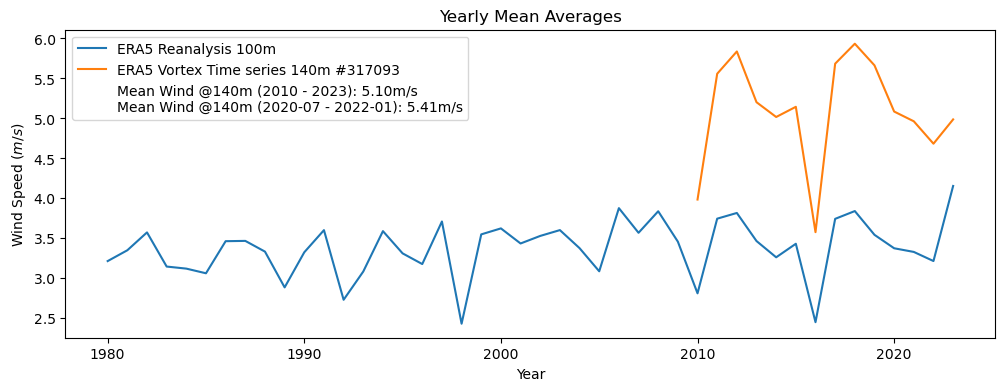

In [15]:
fig, axs = plt.subplots(figsize=(12, 4))
era5.groupby(era5["date_time"].dt.year)["m100"].mean().plot(rot=0, ax=axs, label="ERA5 Reanalysis 100m")
series.groupby(series["timestamp"].dt.year)["M(m/s)"].mean().plot(rot=0, ax=axs, label="ERA5 Vortex Time series 140m #317093")
plt.xlabel("Year");  
plt.ylabel("Wind Speed $(m/s)$");
plt.title("Yearly Mean Averages")
plt.plot([], [], ' ', label="Mean Wind @140m (2010 - 2023): 5.10m/s \nMean Wind @140m (2020-07 - 2022-01): 5.41m/s")

plt.legend()